#### To Do
* bring in more files
* check corpus and freq
* use srt for sentences
* visualise topics

In [1]:
#!pip list

In [38]:
pwd

'C:\\Users\\Sally\\wtp'

In [39]:
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [59]:
pd.options.display.max_rows = 20
df = pd.read_csv('C:\\Users\\Sally\\wtp\\data\\sample.txt',names=['subtitle'])
#df = pd.read_csv('C:\\Users\\Sally\\wtp\\data\\patch69.txt',names=['subtitle'])

In [51]:
df.head(20)

,subtitle
0,you
1,[Music]
2,[Music]
3,[Music]
4,[Music]
5,[Music]
6,[Music]
7,[Music]
8,[Music]
9,[Music]


In [52]:
df.tail(10)

,subtitle
118,absolute string did you have to send a
119,photo no they took your word
120,they took my word yeah try it out it's
121,great
122,I ordered a clear spirit which one it
123,was it was just it was such a good
124,result what are people saying here in
125,the life to just before crack into the
126,episode and Kylie's saying there's a big
127,prize Shiva you know what's


In [53]:
pd.options.display.max_rows = 50

In [54]:
df

,subtitle
0,you
1,[Music]
2,[Music]
3,[Music]
4,[Music]
...,...
123,was it was just it was such a good
124,result what are people saying here in
125,the life to just before crack into the
126,episode and Kylie's saying there's a big


In [55]:
print(df)

                                     subtitle
0                                         you
1                                     [Music]
2                                     [Music]
3                                     [Music]
4                                     [Music]
..                                        ...
123        was it was just it was such a good
124     result what are people saying here in
125    the life to just before crack into the
126  episode and Kylie's saying there's a big
127               prize Shiva you know what's

[128 rows x 1 columns]


In [56]:
len(df)

128

In [57]:
data = df.subtitle.values.tolist()

In [58]:
data

['you',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 '[Music]',
 'hello good to see there good to see you',
 'digitally through the screen hello',
 'Christian hallowed Deon how are you guys',
 "I thought Joshua we're gonna get from",
 "you a good'n target sounds like the",
 'start of a good antagonism how does a',
 'gutentag start uh it starts like Josh',
 "started it but it doesn't end like that",
 "really good hug it's something that",
 'covers the whole day yeah really good',
 "also if you see some graffiti and it's",
 "just really really great it's a good",
 'touch pretty good did you have a tag',
 'when you were younger',
 'uh I used to write my initials JP in',
 'like a cool way so I would do the J and',
 'then off the back neck of the J I would',
 "do the curve of the P ah that's",
 'interesting actually fun fact about my',
 'signature the D in my signature is',
 "exactly or inspired by my mum's D in her",
 'signature surely we

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sally\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
#prepare the stopwords
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [65]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[90])

['prised', 'actually', 'can', 'see', 'in', 'the', 'chat']


In [70]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[90]]])

['prised', 'actually', 'can', 'see', 'in', 'the', 'chat']


In [71]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [72]:
data_words_nostops

[[],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['music'],
 ['hello', 'good', 'see', 'good', 'see'],
 ['digitally', 'screen', 'hello'],
 ['christian', 'hallowed', 'deon', 'guys'],
 ['thought', 'joshua', 'gonna', 'get'],
 ['good', 'target', 'sounds', 'like'],
 ['start', 'good', 'antagonism'],
 ['gutentag', 'start', 'uh', 'starts', 'like', 'josh'],
 ['started', 'end', 'like'],
 ['really', 'good', 'hug', 'something'],
 ['covers', 'whole', 'day', 'yeah', 'really', 'good'],
 ['also', 'see', 'graffiti'],
 ['really', 'really', 'great', 'good'],
 ['touch', 'pretty', 'good', 'tag'],
 ['younger'],
 ['uh', 'used', 'write', 'initials', 'jp'],
 ['like', 'cool', 'way', 'would'],
 ['back', 'neck', 'would'],
 ['curve', 'ah'],
 ['interesting', 'actually', 'fun', 'fact'],
 ['signature', 'signature'],
 ['exactly', 'inspired', 'mum'],
 ['signature', 'surely', 'take', 'inspiration'],
 ['parents', 'signatures', 'right'],
 ['dad', 'really', 'tag', 'school

In [77]:
import en_core_web_sm

In [78]:
nlp = en_core_web_sm.load()

In [79]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
#nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

In [81]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized)

[[], ['music'], ['music'], ['music'], ['music'], ['music'], ['music'], ['music'], ['music'], ['music'], ['good', 'see', 'good', 'see'], ['digitally', 'screen'], ['deon', 'guy'], [], ['good', 'target', 'sound'], ['start', 'good', 'antagonism'], ['start', 'start'], ['start', 'end'], ['really', 'good'], ['cover', 'whole', 'day', 'really', 'good'], ['also', 'see'], ['really', 'really', 'great', 'good'], ['touch', 'pretty', 'good', 'tag'], ['young'], ['use', 'write', 'initial', 'jp'], ['cool', 'way', 'would'], ['back', 'neck', 'would'], ['curve'], ['interesting', 'actually', 'fun', 'fact'], ['signature', 'signature'], ['exactly', 'inspire'], ['signature', 'surely', 'take', 'inspiration'], ['parent', 'signature', 'right'], ['really', 'tag', 'school', 'dion'], ['oil', 'rig', 'stand'], ['oxidation', 'loss', 'electron'], ['reduction'], ['surely', 'try', 'get'], ['bully', 'school', 'increase'], ['chance', 'happen', 'already'], ['overweight', 'ethnic'], ['worried', 'captain'], ['respect'], ['bull

In [83]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [92]:
len(id2word)

159

In [91]:
id2word[2]

'see'

In [87]:
len(texts)

128

In [86]:
len(corpus)

128

* get zip file from http://mallet.cs.umass.edu/download.php
* unzip to somewhere
* set environment variable %MALLET_HOME%
* alternatively, os.environ['MALLET_HOME'] = 'C:\\Users\\huang\\Downloads\\mallet\\mallet-2.0.8'

In [105]:
import os
mallet_path = "C:/Users/Sally/wtp/mallet-2.0.8/bin/mallet"   
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [106]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.7982376451977702


In [108]:
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('word', 0.13636363636363635),
   ('company', 0.13636363636363635),
   ('photo', 0.09090909090909091),
   ('product', 0.09090909090909091),
   ('increase', 0.045454545454545456),
   ('age', 0.045454545454545456),
   ('gin', 0.045454545454545456),
   ('captain', 0.045454545454545456),
   ('cool', 0.045454545454545456),
   ('respect', 0.045454545454545456)]),
 (1,
  [('good', 0.37037037037037035),
   ('start', 0.18518518518518517),
   ('break', 0.1111111111111111),
   ('stand', 0.037037037037037035),
   ('stick', 0.037037037037037035),
   ('tag', 0.037037037037037035),
   ('feel', 0.037037037037037035),
   ('interesting', 0.037037037037037035),
   ('guy', 0.037037037037037035),
   ('couple', 0.037037037037037035)]),
 (2,
  [('back', 0.15789473684210525),
   ('order', 0.10526315789473684),
   ('happen', 0.05263157894736842),
   ('open', 0.05263157894736842),
   ('pretty', 0.05263157894736842),
   ('inspire', 0.05263157894736842),
   ('touch', 0.05263157894736842),
   ('cool', 0.05

### below took like 10 mins to run

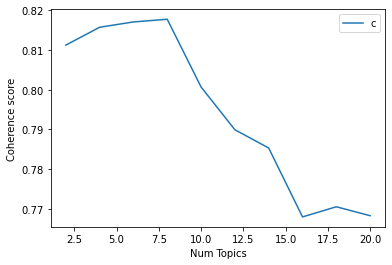

Num Topics = 2  has Coherence Value of 0.8112
Num Topics = 4  has Coherence Value of 0.8157
Num Topics = 6  has Coherence Value of 0.8171
Num Topics = 8  has Coherence Value of 0.8177
Num Topics = 10  has Coherence Value of 0.8007
Num Topics = 12  has Coherence Value of 0.7899
Num Topics = 14  has Coherence Value of 0.7853
Num Topics = 16  has Coherence Value of 0.7679
Num Topics = 18  has Coherence Value of 0.7705
Num Topics = 20  has Coherence Value of 0.7682


In [109]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

limit=21; start=2; step=2;

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [110]:
print('fin')

fin
